In [1]:
import os, io
from google.cloud import vision_v1 as vision
from google.cloud.vision_v1 import types
import pandas as pd
import cv2
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from enum import Enum
from termcolor import colored
%matplotlib inline

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Demz_vision_API_token.json'

In [2]:
# Path to the rc1
rc1_1 = 'rc1-1.jpg'
rc1_2 = 'rc1-2.jpg'
FOLDER_PATH = 'C:\\Users\\USER\\Desktop\\NEW_DEMZ\\OCR\OCR_Works\\Google\\rc1\\images'

In [3]:
# Google API client
client = vision.ImageAnnotatorClient()

In [4]:
# Open and Read contents on the documents
with io.open(os.path.join(FOLDER_PATH, rc1_1), 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content) # Reading the Image Content
rc1_response = client.text_detection(image=content_image) # Text Detection  
rc1_texts = rc1_response.text_annotations # Text Response

# face detection
response_face = client.face_detection(image=content_image)
faceAnnotations = response_face.face_annotations


In [6]:
items = []
lines = {}

for text in rc1_response.text_annotations[1:]:
    top_x_axis = text.bounding_poly.vertices[0].x
    top_y_axis = text.bounding_poly.vertices[0].y
    bottom_y_axis = text.bounding_poly.vertices[3].y

    if top_y_axis not in lines:
        lines[top_y_axis] = [(top_y_axis, bottom_y_axis), []]

    for s_top_y_axis, s_item in lines.items():
        if top_y_axis < s_item[0][1]:
            lines[s_top_y_axis][1].append((top_x_axis, text.description))
            break

for _, item in lines.items():
    if item[1]:
        words = sorted(item[1], key=lambda t: t[0])
        items.append((item[0], ' '.join([word for _, word in words]), words))



In [8]:
for i in items:
    print(i[1])

RET(7)(2005/02) RC1
Republic of South Africa Republiek van Suid-Afrika
CERTIFICATE OF REGISTRATION SERTIFIKAAT VAN REGISTRASIE
IN RESPECT OF MOTOR VEHICLE TEN OPSIGTE VAN MOTORVOERTUIG
(National Road Traffic Act, 1996) IKE E (Nasionale Padverkeerswet, 1996)
Registering authority Johannesburg Registrasie-owerheid
Vehicle register number ZJX226W Voertuigregisternommer
Vehicle identification number (VIN) MRHRU183OJP040138 Voertuigidentifikasienommer (VIN)
Engine number L15Z73500189 Enjinnommer
Make HONDA Fabrikaat
Series name HR-V Reeksnaam
Vehicle category Light passenger mv (less than 12 persons) Voertuigkategorie
Driven Self-propelled / Selfgedrewe Aandrywing
Vehicle description Hatch back / Luikrug Voertuigbeskrywing
Tare (T): kg 1169 Tarra (T): kg
Date of liability 2019-05-10 Datum van aanspreeklikheid
vir eerste lisensiëring
for first licensing
(Nie jaarmodel nie)
(Not year model)
Vehicle status New / Nuut Voertuigstatus
Date liable for registration 2019-05-10 Datum aanspreeklik vir

In [9]:
def draw_boxes(image, bounds,faceAnnotations, color,width=2):
    image = Image.open(image)
#     image = resize_Image(img)
    draw = ImageDraw.Draw(image)
    for text in bounds:
        draw.line([
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y, # left
            text.bounding_poly.vertices[1].x, text.bounding_poly.vertices[1].y, # top
            text.bounding_poly.vertices[2].x, text.bounding_poly.vertices[2].y, # right
            text.bounding_poly.vertices[3].x, text.bounding_poly.vertices[3].y, # bootom
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y],fill=color, width=width)
        txt=text.description
        size = 13
        font=ImageFont.truetype("fonts/arial.ttf",size)
        
#         print('SIZE = ', size)
        draw.text((text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
    try:
        for face in faceAnnotations:
            draw.line([
                face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y,
                face.bounding_poly.vertices[1].x, face.bounding_poly.vertices[1].y,
                face.bounding_poly.vertices[2].x, face.bounding_poly.vertices[2].y,
                face.bounding_poly.vertices[3].x, face.bounding_poly.vertices[3].y,
                face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y],fill='yellow', width=width)
            txt='Face'
            size = 13
            font=ImageFont.truetype("fonts/arial.ttf",size)
            draw.text((face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
    #     image.save('output4.jpg', 'JPEG')
    except:
        pass
    return image

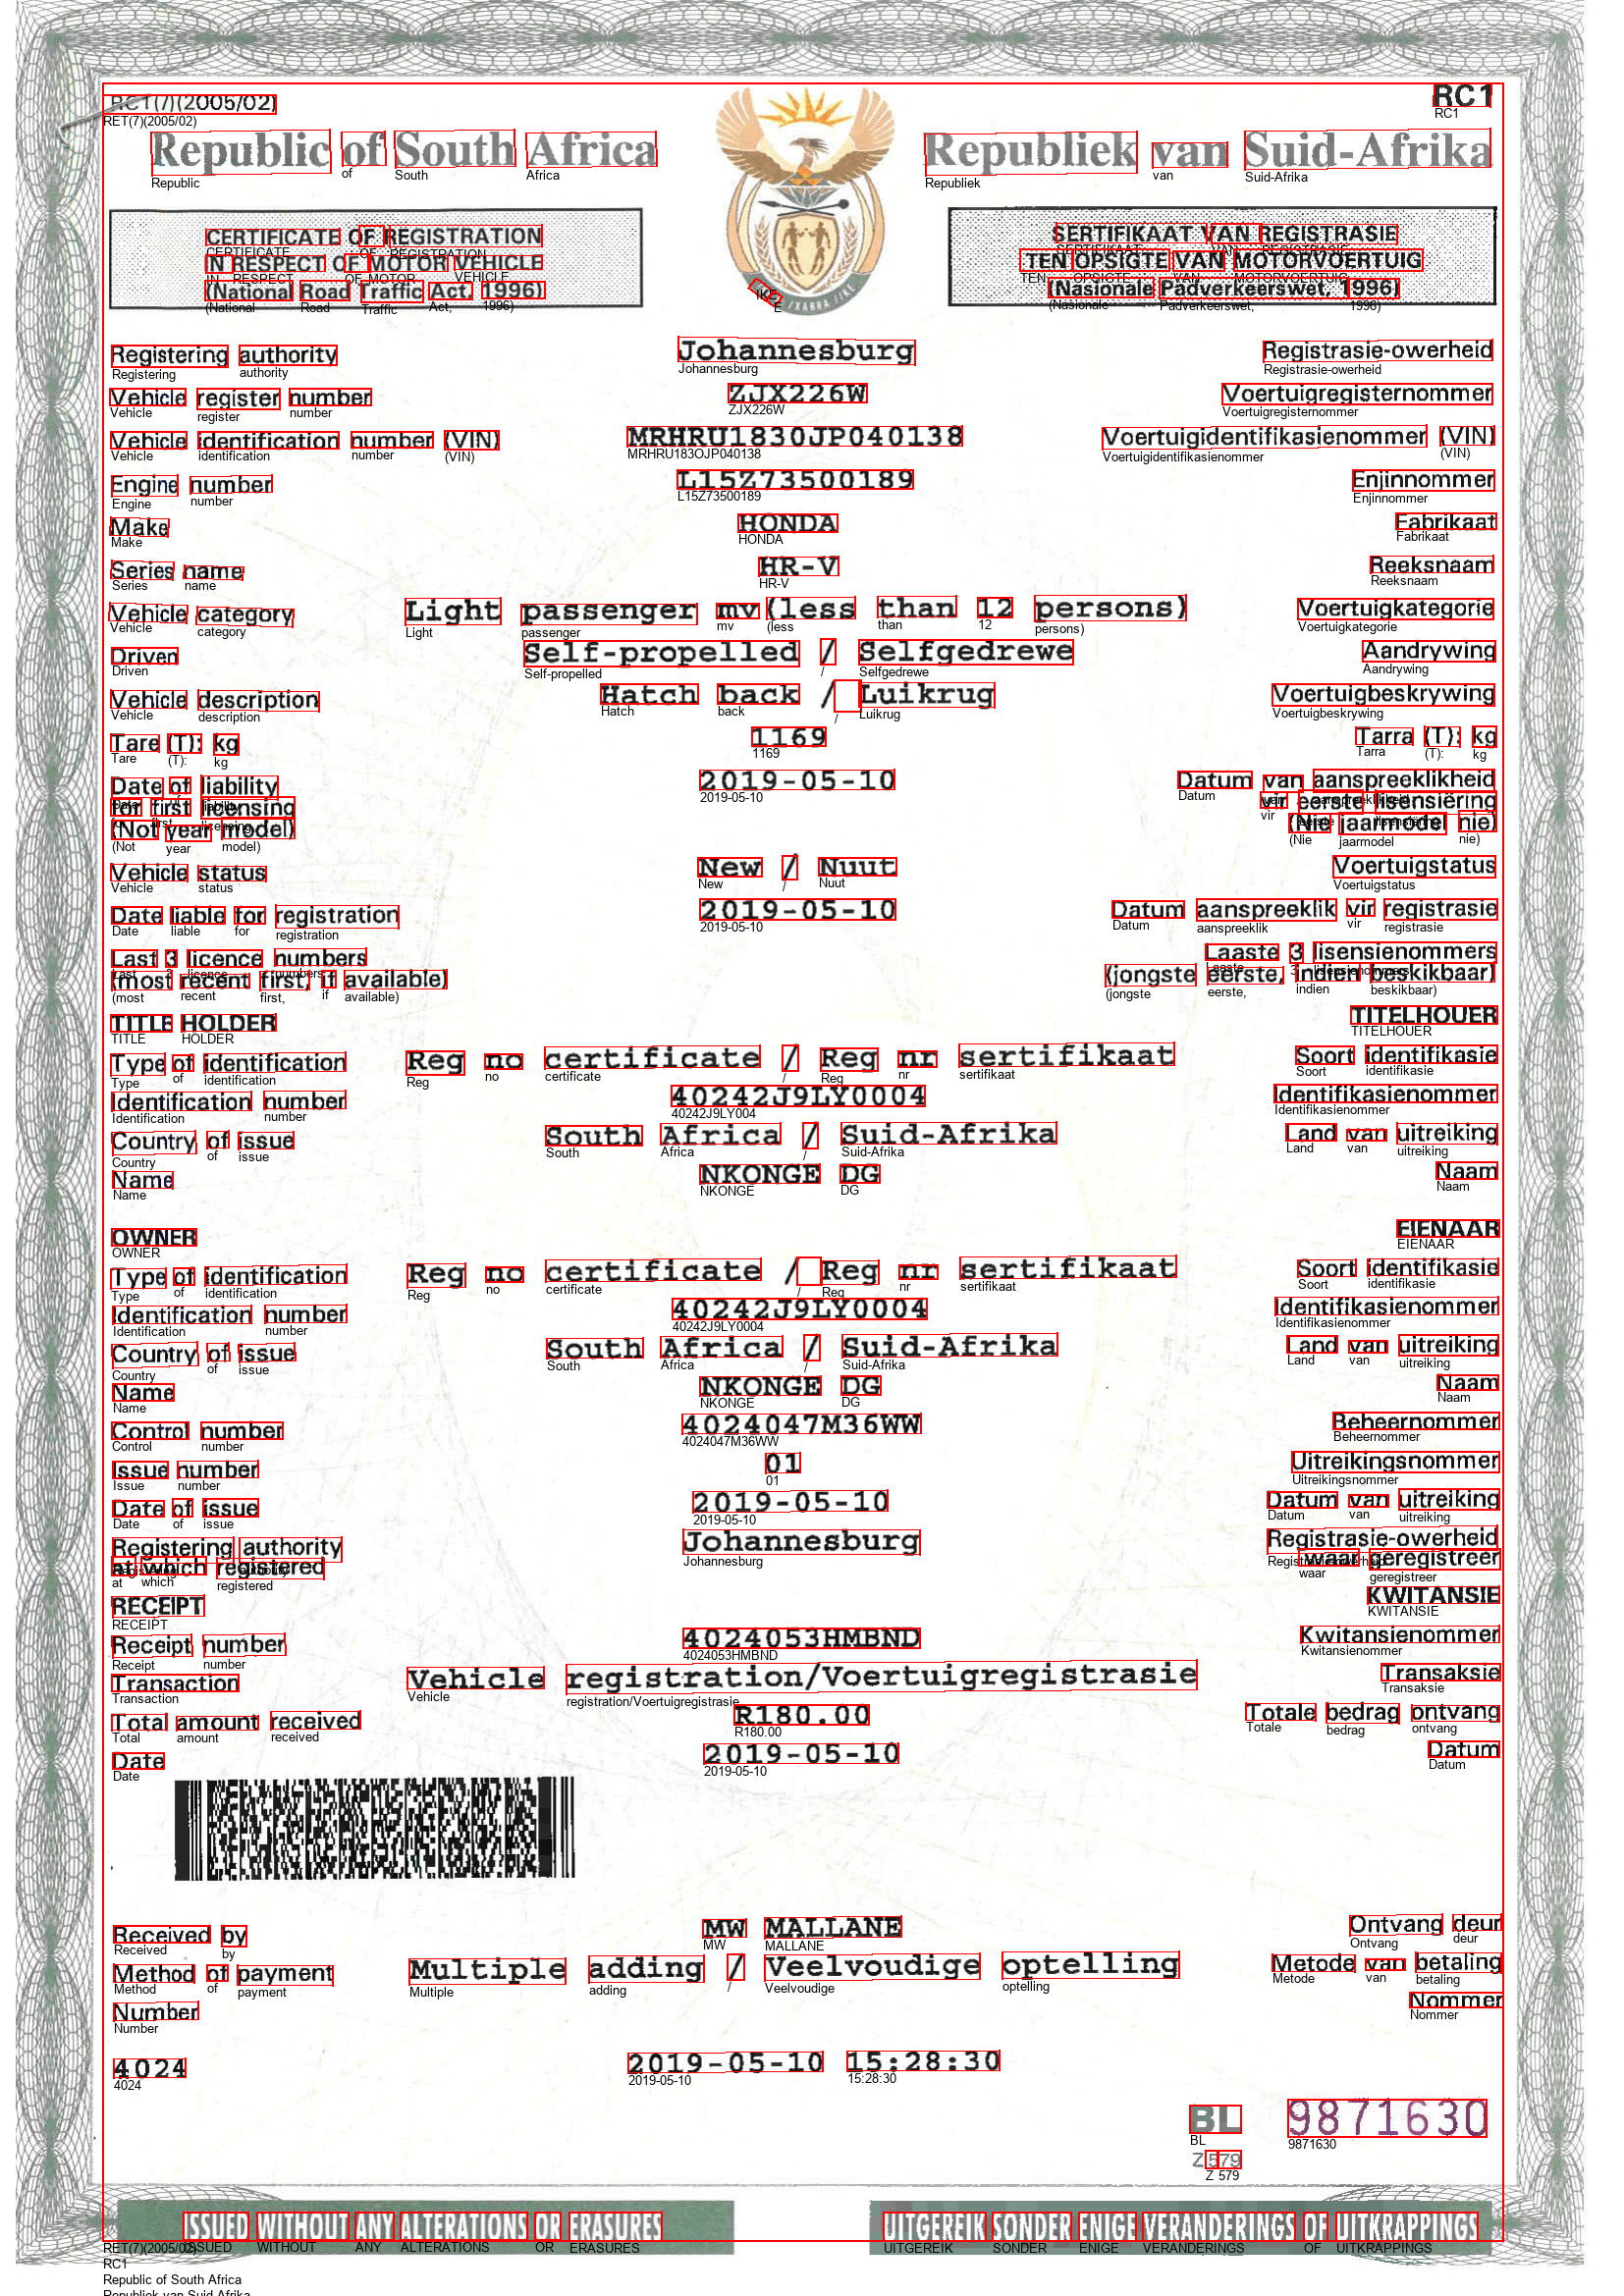

In [10]:
draw_boxes(os.path.join(FOLDER_PATH, rc1_1),rc1_texts, faceAnnotations, 'red')

In [11]:
for text in rc1_texts:
    vertices = ([[vertex.x, vertex.y] for vertex in text.bounding_poly.vertices])
    rc1_contents.append([[text.description],[vertices]])

In [12]:
for text in rc1_texts:
    print(text.description)

RET(7)(2005/02)
RC1
Republic of South Africa
Republiek van Suid-Afrika
CERTIFICATE OF REGISTRATION
IN RESPECT OF MOTOR VEHICLE
(National Road Traffic Act, 1996)
SERTIFIKAAT VAN REGISTRASIE
TEN OPSIGTE VAN MOTORVOERTUIG
(Nasionale Padverkeerswet, 1996)
IKE E
Registering authority
Johannesburg
Registrasie-owerheid
Vehicle register number
ZJX226W
Voertuigregisternommer
Vehicle identification number (VIN)
MRHRU183OJP040138
Voertuigidentifikasienommer (VIN)
Engine number
L15Z73500189
Enjinnommer
Make
HONDA
Fabrikaat
Series name
HR-V
Reeksnaam
Light passenger mv (less than 12 persons)
Self-propelled / Selfgedrewe
Hatch back / Luikrug
Vehicle category
Voertuigkategorie
Driven
Aandrywing
Vehicle description
Voertuigbeskrywing
Tare (T): kg
1169
Tarra (T): kg
Datum van aanspreeklikheid
vir eerste lisensiëring
(Nie jaarmodel nie)
2019-05-10
Date of liability
for first licensing
(Not year model)
Vehicle status
New / Nuut
Voertuigstatus
Date liable for registration
2019-05-10
Datum aanspreeklik vir

In [23]:
rc1_contents = [] # PCO Contents
    
# Extract Driver License Contents
for text in rc1_texts:
    vertices = ([[vertex.x, vertex.y] for vertex in text.bounding_poly.vertices])
    rc1_contents.append([[text.description],vertices])
    
rc1_String_Content = rc1_contents # Get the first content 

In [24]:
text = rc1_String_Content[1:]

In [25]:
# def Sort(sub_li): 
#     l = len(sub_li) 
#     for i in range(0, l): 
# #         print(l-i-1)
#         for j in range(0, l-i-1): 
# #             print(sub_li[j][1])
#             if (sub_li[j][1][2][-1] >= sub_li[j + 1][1][2][-1] and sub_li[j][1][1][0] >= sub_li[j + 1][1][1][0]): 
#                 tempo = sub_li[j] 
#                 sub_li[j]= sub_li[j + 1] 
#                 sub_li[j + 1]= tempo 
#     return sub_li 

In [37]:
# simple sort algorithm 
# def sort(sub_list):
sort_content = sorted(text, key=lambda x: [x[1][2][-1] + x[1][2][-1]])
sort_content

[[['RC1'], [[1461, 84], [1518, 85], [1517, 109], [1460, 108]]],
 [['RET(7)(2005/02)'], [[105, 96], [280, 96], [280, 116], [105, 116]]],
 [['of'], [[348, 134], [391, 133], [392, 168], [349, 169]]],
 [['South'], [[402, 133], [523, 131], [524, 169], [403, 171]]],
 [['Africa'], [[536, 135], [667, 133], [668, 169], [537, 171]]],
 [['van'], [[1174, 145], [1249, 144], [1249, 170], [1174, 171]]],
 [['Suid-Afrika'], [[1268, 133], [1517, 130], [1517, 170], [1268, 173]]],
 [['Republic'], [[154, 134], [335, 131], [336, 176], [155, 179]]],
 [['Republiek'], [[942, 136], [1157, 133], [1157, 176], [943, 179]]],
 [['SERTIFIKAAT'], [[1076, 226], [1228, 227], [1228, 248], [1076, 247]]],
 [['VAN'], [[1234, 227], [1283, 227], [1283, 248], [1234, 248]]],
 [['CERTIFICATE'], [[210, 233], [345, 232], [345, 249], [210, 250]]],
 [['REGISTRASIE'], [[1285, 227], [1422, 228], [1422, 249], [1285, 248]]],
 [['OF'], [[366, 229], [390, 229], [390, 251], [366, 251]]],
 [['REGISTRATION'], [[397, 229], [551, 228], [551, 2

In [540]:
text = Sort(text) 

In [ ]:
[['Vehicle'], [[112, 613], [190, 616], [189, 635], [111, 632]]],
 [['category'], [[201, 617], [298, 620], [297, 639], [200, 636]]],
    
[['Light'], [[413, 609], [509, 608], [509, 636], [413, 637]]],
 [['passenger'], [[531, 615], [709, 614], [709, 636], [531, 637]]],
 [['mv'], [[730, 614], [772, 614], [772, 630], [730, 630]]],
 [['(less'], [[781, 608], [870, 607], [870, 630], [781, 631]]],
 [['than'], [[894, 607], [973, 606], [973, 628], [894, 629]]],
 [['12'], [[996, 608], [1030, 608], [1030, 629], [996, 629]]],
 [['persons)'], [[1054, 606], [1207, 605], [1207, 632], [1054, 633]]],

    
[['Voertuigkategorie'], [[1322, 609], [1520, 609], [1520, 631], [1322, 631]]],

In [541]:
text

[[['RET(7)(2005/02)'], [[105, 96], [280, 96], [280, 116], [105, 116]]],
 [['RC1'], [[1461, 84], [1518, 85], [1517, 109], [1460, 108]]],
 [['Republic'], [[154, 134], [335, 131], [336, 176], [155, 179]]],
 [['of'], [[348, 134], [391, 133], [392, 168], [349, 169]]],
 [['South'], [[402, 133], [523, 131], [524, 169], [403, 171]]],
 [['Africa'], [[536, 135], [667, 133], [668, 169], [537, 171]]],
 [['Republiek'], [[942, 136], [1157, 133], [1157, 176], [943, 179]]],
 [['van'], [[1174, 145], [1249, 144], [1249, 170], [1174, 171]]],
 [['Suid-Afrika'], [[1268, 133], [1517, 130], [1517, 170], [1268, 173]]],
 [['CERTIFICATE'], [[210, 233], [345, 232], [345, 249], [210, 250]]],
 [['OF'], [[366, 229], [390, 229], [390, 251], [366, 251]]],
 [['REGISTRATION'], [[397, 229], [551, 228], [551, 251], [397, 252]]],
 [['IN'], [[210, 259], [236, 259], [236, 278], [210, 278]]],
 [['RESPECT'], [[237, 260], [330, 259], [330, 276], [237, 277]]],
 [['OF'], [[351, 258], [376, 258], [376, 277], [351, 277]]],
 [['MOT

In [497]:
# # sorted_bbox_index = [i[0] for i in sorted(enumerate(text), key=lambda x:(x[1][0][0] + x[1][2][1]**2))]

# # my_list = sorted(my_list , key=lambda x:(x[1][0][0] + x[1][1][1]**2))
# my_list

In [ ]:
Registrasie-owerheid
[[1287, 347], [1519, 345], [1519, 367], [1287, 369]]

Voertuigregisternommer
[[1245, 390], [1519, 390], [1519, 412], [1245, 412]]

Datum
[[1455, 1773], [1526, 1773], [1526, 1790], [1455, 1790]]

Nommer
[[1436, 2029], [1530, 2029], [1530, 2045], [1436, 2045]]

BL
[[1212, 2144], [1263, 2144], [1263, 2173], [1212, 2173]]
9871630
[[1312, 2138], [1513, 2138], [1513, 2177], [1312, 2177]]

In [ ]:
Republic
[[154, 134], [335, 131], [336, 176], [155, 179]]
of
[[348, 134], [391, 133], [392, 168], [349, 169]]
South
[[402, 133], [523, 131], [524, 169], [403, 171]]
Africa

[[536, 135], [667, 133], [668, 169], [537, 171]]
Republiek
[[942, 136], [1157, 133], [1157, 176], [943, 179]]
van
[[1174, 145], [1249, 144], [1249, 170], [1174, 171]]
Suid-Afrika
[[1268, 133], [1517, 130], [1517, 170], [1268, 173]]

In [458]:
# for item in range(len(text) -1):
#     left = text[item][1][0][0]
#     cur_right = text[item][1][1][0]
#     next_right = text[item + 1][1][1][0]
#     cur_top = text[item][1][1][1]
#     bottom = text[item][1][3][1]
# #     print(text[item][0][0], cur_right)
# #     if abs(cur_right - next_right) < 5:
#     print(text[item][0][0])
#     print(text[item][1][0])

In [ ]:
Light
[[413, 609], [509, 608], [509, 636], [413, 637]]
passenger
[[531, 615], [709, 614], [709, 636], [531, 637]]
mv
[[730, 614], [772, 614], [772, 630], [730, 630]]
(less
[[781, 608], [870, 607], [870, 630], [781, 631]]
than
[[894, 607], [973, 606], [973, 628], [894, 629]]
12
[[996, 608], [1030, 608], [1030, 629], [996, 629]]
persons)

Vehicle
[[112, 613], [190, 616], [189, 635], [111, 632]]
category
[[201, 617], [298, 620], [297, 639], [200, 636]]
Voertuigkategorie
[[1322, 609], [1520, 609], [1520, 631], [1322, 631]]

In [486]:
# Join Words that are in the same line
content = []
for item in range(len(text) -1):
#     print(text[item][1])
    left = text[item][1][0][0]
    right = text[item][1][1][1]
    cur_top = text[item][1][2][1]
    nxt_top = text[item + 1][1][2][1]
    bottom = text[item][1][3][1]
    current_items = []
    if abs(cur_top - nxt_top) <=10:
        if content:
            if not content[-1] != []:
                if content[-1] != text[item][0]:
                    current_items.append(text[item])
                    current_items.append(text[item + 1])
                else:
                    current_items.append(text[item])
                    current_items.append(text[item + 1])
            else:
                current_items.append(text[item + 1])
        else:
            current_items.append(text[item])
            current_items.append(text[item + 1])
           
    content.append(current_items)

In [368]:

   # TEXT     #bottom left   #bottom right   #top right   #top left
[['Republic'], [[154, 134],  [335, 131],     [336, 176],  [155, 179]]

In [427]:
# for i in range(len(content)):
#     print(content[i][0][0], content[i][1][2])
# # content

In [487]:
content

[[[['RET(7)(2005/02)'], [[105, 96], [280, 96], [280, 116], [105, 116]]],
  [['RC1'], [[1461, 84], [1518, 85], [1517, 109], [1460, 108]]]],
 [],
 [[['Republic'], [[154, 134], [335, 131], [336, 176], [155, 179]]],
  [['of'], [[348, 134], [391, 133], [392, 168], [349, 169]]]],
 [[['South'], [[402, 133], [523, 131], [524, 169], [403, 171]]]],
 [[['Africa'], [[536, 135], [667, 133], [668, 169], [537, 171]]]],
 [[['Republiek'], [[942, 136], [1157, 133], [1157, 176], [943, 179]]]],
 [[['van'], [[1174, 145], [1249, 144], [1249, 170], [1174, 171]]]],
 [[['Suid-Afrika'], [[1268, 133], [1517, 130], [1517, 170], [1268, 173]]]],
 [],
 [[['CERTIFICATE'], [[210, 233], [345, 232], [345, 249], [210, 250]]],
  [['OF'], [[366, 229], [390, 229], [390, 251], [366, 251]]]],
 [[['REGISTRATION'], [[397, 229], [551, 228], [551, 251], [397, 252]]]],
 [],
 [[['IN'], [[210, 259], [236, 259], [236, 278], [210, 278]]],
  [['RESPECT'], [[237, 260], [330, 259], [330, 276], [237, 277]]]],
 [[['OF'], [[351, 258], [376,

# Sort

In [447]:
# my_list = content 
# # for i in range(len(content)):
# my_list = sorted(my_list , key=lambda k: [k[1][0][0], k[1][0][1], k[1][2][0], k[1][2][1]])
# my_list

[[['RET(7)(2005/02)'], [[105, 96], [280, 96], [280, 116], [105, 116]]],
 [['Vehicle'], [[112, 395], [188, 395], [188, 413], [112, 413]]],
 [['Vehicle'], [[112, 613], [190, 616], [189, 635], [111, 632]]],
 [['Vehicle'], [[113, 439], [189, 439], [189, 457], [113, 457]]],
 [['Make'], [[113, 526], [171, 528], [170, 547], [112, 545]]],
 [['Vehicle'], [[113, 702], [189, 703], [189, 722], [113, 721]]],
 [['Tare'], [[113, 747], [161, 748], [161, 766], [113, 765]]],
 [['for'], [[113, 813], [143, 813], [143, 831], [113, 831]]],
 [['Vehicle'], [[113, 879], [190, 880], [190, 898], [113, 897]]],
 [['TITLE'], [[113, 1033], [174, 1033], [174, 1051], [113, 1051]]],
 [['Type'], [[113, 1073], [167, 1072], [167, 1095], [113, 1096]]],
 [['Type'], [[113, 1292], [168, 1291], [168, 1312], [113, 1313]]],
 [['Registering'], [[114, 351], [231, 351], [231, 374], [114, 374]]],
 [['Engine'], [[114, 484], [180, 483], [180, 505], [114, 506]]],
 [['Series'], [[114, 570], [176, 572], [175, 591], [113, 589]]],
 [['Driv

In [ ]:
def EBE_sort_text(content: list, boundaries: list) -> list:
    """Sort text using number of columns and width to sort it accordingly.

    
    Build a quick function to sort the order in which things appear on the 
    contents list by the weighted combination of the left and top position of 
    the list item. It first detects boundaries in the page based on the number 
    of columns and then normalizes the left position of any of the item that 
    falls within the boundaries. This is to prevent any small difference 
    between left positions of texts that share common boundaries from being 
    wrongly sorted because the algorithm tends to give more weight to the 
    left positon of the text than the top position.

    Key arguments:
    content -- List of pdf content
    boundaries -- List of page boundaries
    """
    bbox2_list = []
    for i in range(len(content)):
        temp = content[i]
        bbox = temp[1]
        for boundary in reversed(boundaries):
            if bbox[0][0] >= boundary:
                left = boundary
                break
        #this gets the (top, left) value for every line in the contents
        bbox2 = (bbox[0][1], left)
        bbox2_list.append(bbox2)
    sorted_bbox_index = [i[0] for i in sorted(enumerate(bbox2_list), key=lambda x:(x[1][0] + x[1][1]**2))]
    sorted_content = [content[i] for i in sorted_bbox_index]

    return sorted_content

In [304]:
# pip install google-cloud-translate==2.0.0

In [310]:
# import os
# from google.cloud import translate_v2 as translate

# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Demz_vision_API_token.json'

# translate_client = translate.Client()
# text = 'Good Morning. GoodBye. And Hello'
# target = 'ja'
# output = translate_client.translate(text, target_language=target)
# print(output)

{'translatedText': 'おはようございます。さようなら。そしてこんにちは', 'detectedSourceLanguage': 'en', 'input': 'Good Morning. GoodBye. And Hello'}
